# Transformers: Position Embeddings  
### Definition, Derivation, Computation, Visualization, and Use-Case

Transformers process input tokens in parallel (unlike RNNs), so they require **positional information**.

This notebook covers:
- Why position embeddings exist  
- Mathematical derivation of sinusoidal positional encoding  
- Step-by-step computation  
- 2D and 3D visualization  
- Interpretation and use case


## 1. Motivation

Transformer attention is permutation-invariant.  
To preserve order, positional encodings inject location-based information.

---

## 2. Sinusoidal Position Encoding Definition

For a position $pos$ and dimension index $i$:

The embedding dimension is $d_{model}$.

Even indices use sine:
$$
PE_{(pos, 2i)} = \sin\left( \frac{pos}{10000^{2i/d_{model}}} \right)
$$

Odd indices use cosine:
$$
PE_{(pos, 2i+1)} = \cos\left( \frac{pos}{10000^{2i/d_{model}}} \right)
$$

---

## 3. Why sinusoidal functions?

### Smooth gradients:
$$
\frac{d}{dpos} \sin(pos) = \cos(pos)
$$

### Unique representation:
Different wavelengths generate linearly independent features.

### Relative positions preserved:

For any shift $k$:
$$
PE(pos+k) \text{ can be expressed as a linear function of } PE(pos)
$$

Thus, dot-product attention can detect relative distance.

---

## 4. Transformer Combining Position Embeddings

Given token embeddings $X$, positional vectors $P$ are added:

$$
Z_{pos} = X + P
$$

This injects order without modifying attention formulation.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

np.set_printoptions(suppress=True, precision=4)

print("Libraries loaded.")


Libraries loaded.


In [2]:
def sinusoidal_position_encoding(max_pos, d_model):
    pe = np.zeros((max_pos, d_model))

    for pos in range(max_pos):
        for i in range(0, d_model, 2):
            angle = pos / (10000 ** (i / d_model))
            pe[pos, i] = np.sin(angle)          # even index
            pe[pos, i+1] = np.cos(angle)        # odd index

            print(f"pos={pos}, dim={i}/{i+1}, angle={angle:.6f}, sin={pe[pos,i]:.6f}, cos={pe[pos,i+1]:.6f}")

    return pe

# compute for 10 positions, 6 dimensional embedding
pe_small = sinusoidal_position_encoding(10, 6)

print("\nGenerated Positional Encoding Matrix:\n", pe_small)


pos=0, dim=0/1, angle=0.000000, sin=0.000000, cos=1.000000
pos=0, dim=2/3, angle=0.000000, sin=0.000000, cos=1.000000
pos=0, dim=4/5, angle=0.000000, sin=0.000000, cos=1.000000
pos=1, dim=0/1, angle=1.000000, sin=0.841471, cos=0.540302
pos=1, dim=2/3, angle=0.046416, sin=0.046399, cos=0.998923
pos=1, dim=4/5, angle=0.002154, sin=0.002154, cos=0.999998
pos=2, dim=0/1, angle=2.000000, sin=0.909297, cos=-0.416147
pos=2, dim=2/3, angle=0.092832, sin=0.092699, cos=0.995694
pos=2, dim=4/5, angle=0.004309, sin=0.004309, cos=0.999991
pos=3, dim=0/1, angle=3.000000, sin=0.141120, cos=-0.989992
pos=3, dim=2/3, angle=0.139248, sin=0.138798, cos=0.990321
pos=3, dim=4/5, angle=0.006463, sin=0.006463, cos=0.999979
pos=4, dim=0/1, angle=4.000000, sin=-0.756802, cos=-0.653644
pos=4, dim=2/3, angle=0.185664, sin=0.184599, cos=0.982814
pos=4, dim=4/5, angle=0.008618, sin=0.008618, cos=0.999963
pos=5, dim=0/1, angle=5.000000, sin=-0.958924, cos=0.283662
pos=5, dim=2/3, angle=0.232079, sin=0.230002, cos=0

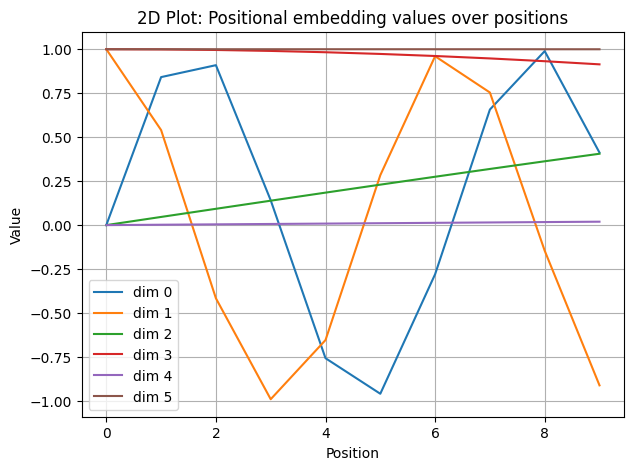

In [3]:
plt.figure(figsize=(7,5))

for dim in range(6):
    plt.plot(pe_small[:, dim], label=f"dim {dim}")

plt.title("2D Plot: Positional embedding values over positions")
plt.xlabel("Position")
plt.ylabel("Value")
plt.grid()
plt.legend()
plt.show()


pos=0, dim=0/1, angle=0.000000, sin=0.000000, cos=1.000000
pos=0, dim=2/3, angle=0.000000, sin=0.000000, cos=1.000000
pos=0, dim=4/5, angle=0.000000, sin=0.000000, cos=1.000000
pos=0, dim=6/7, angle=0.000000, sin=0.000000, cos=1.000000
pos=0, dim=8/9, angle=0.000000, sin=0.000000, cos=1.000000
pos=0, dim=10/11, angle=0.000000, sin=0.000000, cos=1.000000
pos=0, dim=12/13, angle=0.000000, sin=0.000000, cos=1.000000
pos=0, dim=14/15, angle=0.000000, sin=0.000000, cos=1.000000
pos=0, dim=16/17, angle=0.000000, sin=0.000000, cos=1.000000
pos=0, dim=18/19, angle=0.000000, sin=0.000000, cos=1.000000
pos=0, dim=20/21, angle=0.000000, sin=0.000000, cos=1.000000
pos=0, dim=22/23, angle=0.000000, sin=0.000000, cos=1.000000
pos=0, dim=24/25, angle=0.000000, sin=0.000000, cos=1.000000
pos=0, dim=26/27, angle=0.000000, sin=0.000000, cos=1.000000
pos=0, dim=28/29, angle=0.000000, sin=0.000000, cos=1.000000
pos=0, dim=30/31, angle=0.000000, sin=0.000000, cos=1.000000
pos=1, dim=0/1, angle=1.000000, si

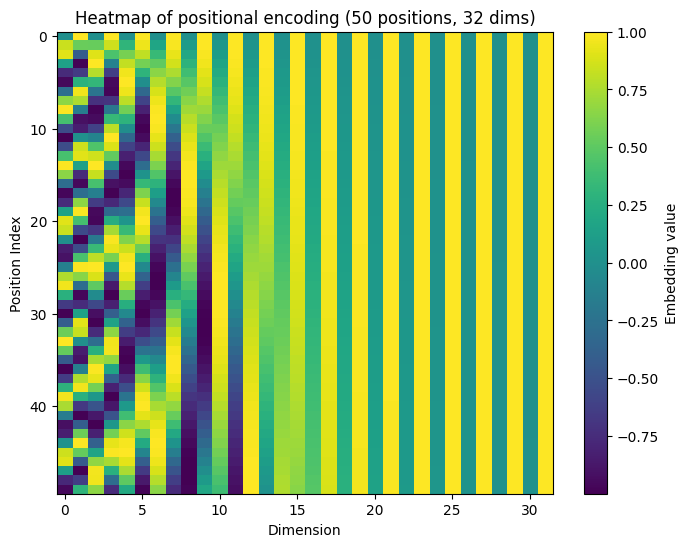

In [4]:
pe_large = sinusoidal_position_encoding(50, 32)

plt.figure(figsize=(8,6))
plt.imshow(pe_large, aspect="auto", cmap="viridis")
plt.colorbar(label="Embedding value")
plt.title("Heatmap of positional encoding (50 positions, 32 dims)")
plt.xlabel("Dimension")
plt.ylabel("Position Index")
plt.show()


In [6]:
# regenerate positional encodings long enough for 50 positions
pe_small = get_positional_encoding(50, d_model)  # whatever function you used

pos = np.arange(50)
dim = np.arange(6)
X, Y = np.meshgrid(pos, dim)

Z = pe_small[:50, :6].T  # now shape (6,50)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0, antialiased=True)

ax.set_title("3D Surface: Sinusoidal Encoding Wave Patterns")
ax.set_xlabel("Position")
ax.set_ylabel("Dimension")
ax.set_zlabel("Value")

plt.show()


NameError: name 'get_positional_encoding' is not defined

In [7]:
# Example token embeddings
token_embeddings = np.random.randn(10, 6)

print("Token embeddings before adding PE:\n", token_embeddings)

# Combine with positional encoding
combined = token_embeddings + pe_small

print("\nToken embeddings AFTER adding positional encoding:\n", combined)


Token embeddings before adding PE:
 [[ 1.3021  0.7147 -2.3907  0.3678 -0.2427 -0.7209]
 [ 0.1859 -2.1859  0.1464 -0.2377  0.5961 -0.1142]
 [ 1.0446 -1.0885  0.9436  1.6719  0.3147 -0.6761]
 [-0.1438 -2.0925  0.783  -1.8329  0.2641 -1.4411]
 [ 1.289   1.1386 -1.714  -1.4649  0.1172  0.5127]
 [-0.5965  1.4495 -1.5323 -0.2255 -1.4468 -1.0205]
 [ 1.335   0.6481  1.0428  0.0268  1.2209  1.3576]
 [-2.2653 -0.1013  1.2287  0.7284 -0.6222  0.0954]
 [ 0.8926  0.7923  0.1106 -0.1097  1.4808  0.9131]
 [ 1.3543  0.4687  0.4885  0.6205 -1.1889 -0.1398]]

Token embeddings AFTER adding positional encoding:
 [[ 1.3021  1.7147 -2.3907  1.3678 -0.2427  0.2791]
 [ 1.0274 -1.6456  0.1928  0.7613  0.5983  0.8858]
 [ 1.9539 -1.5047  1.0363  2.6676  0.319   0.3238]
 [-0.0027 -3.0825  0.9218 -0.8426  0.2706 -0.4411]
 [ 0.5322  0.4849 -1.5294 -0.482   0.1258  1.5126]
 [-1.5554  1.7332 -1.3023  0.7477 -1.436  -0.0206]
 [ 1.0556  1.6083  1.3177  0.9883  1.2338  2.3575]
 [-1.6083  0.6526  1.5479  1.6761 -0.6071  

## Interpretation

### What do we observe?

1. **Smooth wave-like patterns**
   Higher dimensions oscillate faster due to differing frequency scales.

2. **Heatmap**
   Shows position embeddings uniquely encode each position.

3. **3D wave surface**
   Provides intuition that different frequency channels form a basis.

---

## Use in Transformer Encoder

For sequence tokens:

$$
Z = X + PE
$$

This gives the model knowledge of word order without recurrence.

---

## Why additive form?

Because:
- Attention learns alignment via dot-products
- Additive injection allows relative positions to influence similarity

Transformers thus learn ordering while remaining parallel and efficient.


## Summary

✔ Defined positional embedding concept  
✔ Derived sinusoidal formulation  
✔ Manually computed encoding values  
✔ Printed intermediate values  
✔ Visualized embeddings in:

- 2D time-series
- Heatmaps
- 3D wave surface

✔ Demonstrated how positional vectors combine with embeddings
